## Tiền xử lý dữ liệu về các xe hơi sản xuất vào năm 1985
- Đường dẫn tập dữ liệu 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'. Tập dữ liệu dự đoán giá xe (biến price)
- Danh sách tên biến: 'symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
                'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 
                'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'
- Mô tả các biến (trong tập tin automobile.docx)
- Đọc dữ liệu và xem thông tin cơ bản. HD: shape, columns, dtypes, info(), head(), tail(), ...
### Yêu cầu:
- Kiểm tra dữ liệu bị trùng
- Xác định các thuộc tính: các biến định tính, các biến định lượng
- Xử lý dữ liệu bị thiếu
- Thống kê mô tả
- Kiểm tra outlier
- Vẽ biểu đồ phân phối dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Đọc dữ liệu và xem thông tin cơ bản

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
column_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
                'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
                'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 
                'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
# automobile_data = pd.read_csv(url, names=column_names, na_values='?')
automobile_data = pd.read_csv('data/Automobile_data.csv', names=column_names, na_values='?')

In [8]:
automobile_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
automobile_data.shape

(205, 26)

In [10]:
automobile_data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [11]:
automobile_data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [12]:
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [13]:
automobile_data.duplicated().any()

False

## Xác định các thuộc tính

In [14]:
# Các biến định tính
cat_cols = automobile_data.select_dtypes('object').columns
cat_cols

Index(['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders',
       'fuel_system'],
      dtype='object')

In [15]:
# Các biến định lượng
num_cols = automobile_data.select_dtypes(include='number').columns
num_cols

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [16]:
for col in cat_cols:
    print(col, ':', automobile_data[col].nunique(), '-', automobile_data[col].unique())

make : 22 - ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type : 2 - ['gas' 'diesel']
aspiration : 2 - ['std' 'turbo']
num_doors : 2 - ['two' 'four' nan]
body_style : 5 - ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels : 3 - ['rwd' 'fwd' '4wd']
engine_location : 2 - ['front' 'rear']
engine_type : 7 - ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num_cylinders : 7 - ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel_system : 8 - ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [19]:
for col in num_cols:
    print(col, automobile_data[col].unique())

symboling [ 3  1  2  0 -1 -2]
normalized_losses [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
wheel_base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1]
length [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.

In [20]:
for col in num_cols:
    n = automobile_data[col].nunique()
    print(col, ':', n)
    if n<=10:
        print('\t', automobile_data[col].unique())

symboling : 6
	 [ 3  1  2  0 -1 -2]
normalized_losses : 51
wheel_base : 53
length : 75
width : 44
height : 49
curb_weight : 171
engine_size : 44
bore : 38
stroke : 36
compression_ratio : 32
horsepower : 59
peak_rpm : 23
city_mpg : 29
highway_mpg : 30
price : 186


In [21]:
automobile_data['symboling'] = automobile_data['symboling'].astype('object')

In [22]:
# Các biến định tính
cat_cols = automobile_data.select_dtypes('object').columns
cat_cols

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_doors',
       'body_style', 'drive_wheels', 'engine_location', 'engine_type',
       'num_cylinders', 'fuel_system'],
      dtype='object')

In [23]:
# Các biến định lượng
num_cols = automobile_data.select_dtypes(include='number').columns
num_cols

Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

## Tiền xử lý dữ liệu

In [24]:
# Xử lý dữ liệu bị thiếu
ser = automobile_data.isnull().sum()
ser_null = ser[ser>0]
ser_null

normalized_losses    41
num_doors             2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [25]:
automobile_data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [26]:
# Nếu biến số thì thay giá trị bị thiếu bằng mean
# Nếu biến phân loại thì thay giá trị bị thiếu bằng mode
for col in ser_null.index:
    if automobile_data[col].dtype=='object':
        automobile_data[col].fillna(automobile_data[col].mode()[0], inplace=True)
    else:
        automobile_data[col].fillna(automobile_data[col].mean(), inplace=True)

In [29]:
# Thống kê mô tả các biến số
automobile_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
normalized_losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255423,0.313597,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [30]:
# Thống kê mô tả các biến phân loại
automobile_data[cat_cols].describe().T

,count,unique,top,freq
symboling,205,6,0,67
make,205,22,toyota,32
fuel_type,205,2,gas,185
aspiration,205,2,std,168
num_doors,205,2,four,116
body_style,205,5,sedan,96
drive_wheels,205,3,fwd,120
engine_location,205,2,front,202
engine_type,205,7,ohc,148
num_cylinders,205,7,four,159


In [31]:
# Thống kê đếm các biến phân loại
for col in cat_cols:
    print(automobile_data[col].value_counts(), '\n')

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64 

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64 

gas       185
diesel     20
Name: fuel_type, dtype: int64 

std      168
turbo     37
Name: aspiration, dtype: int64 

four    116
two      89
Name: num_doors, dtype: int64 

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64 

fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64 

front    202
rear       3
Name: engine_location, dtype: int64 

ohc      148
ohcf

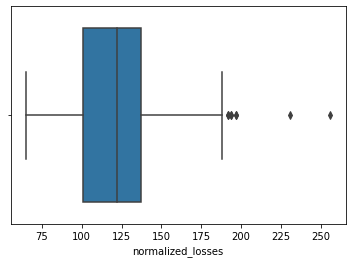

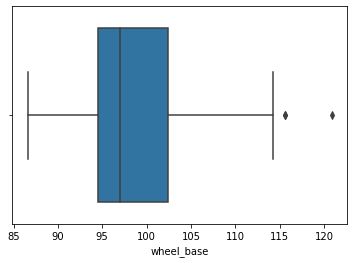

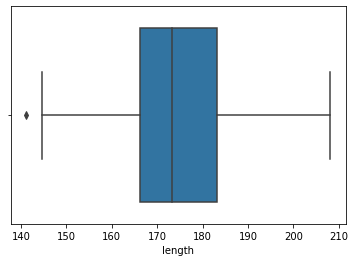

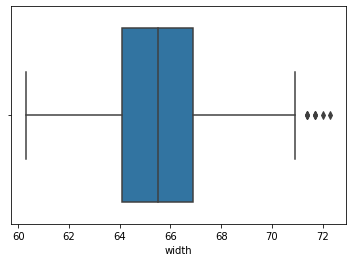

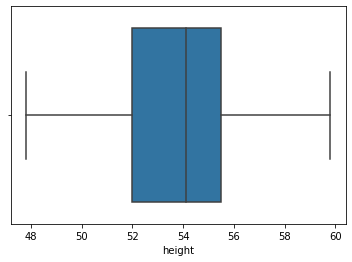

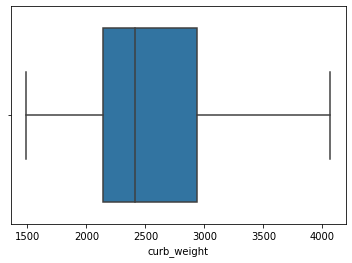

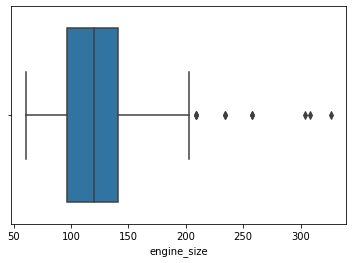

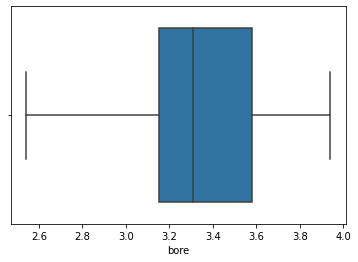

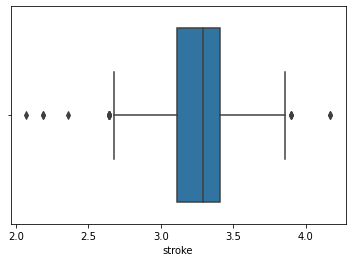

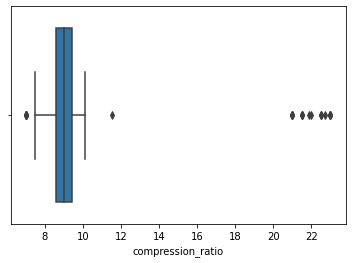

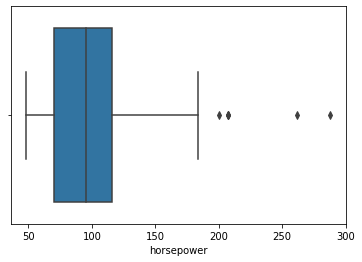

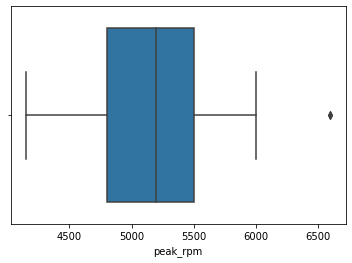

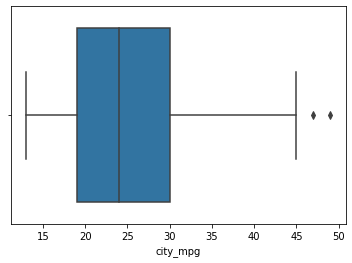

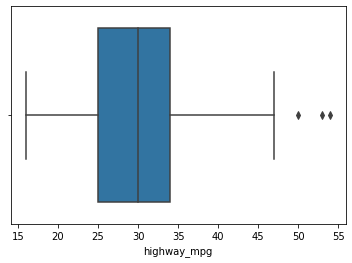

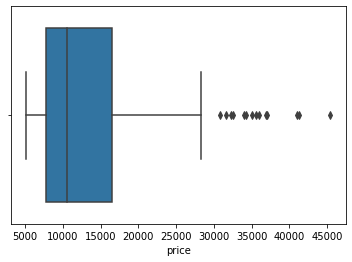

In [32]:
# Kiểm tra outlier
for col in num_cols:
    sns.boxplot(data=automobile_data, x=col)
    plt.show()

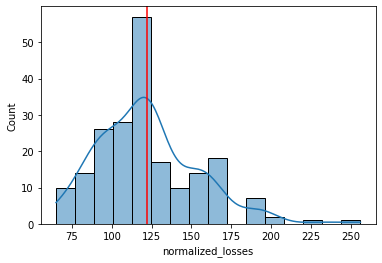

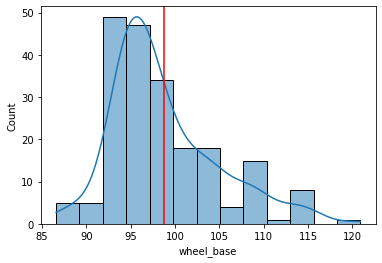

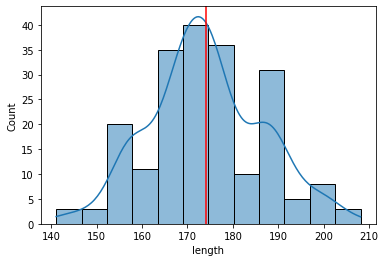

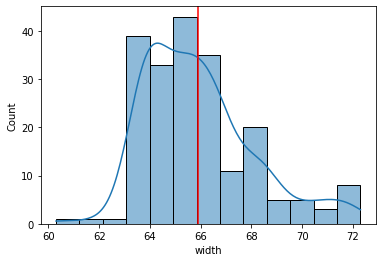

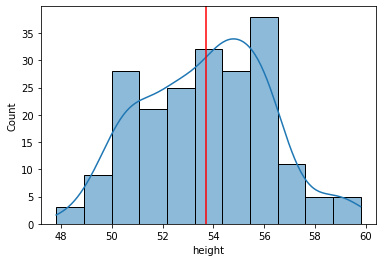

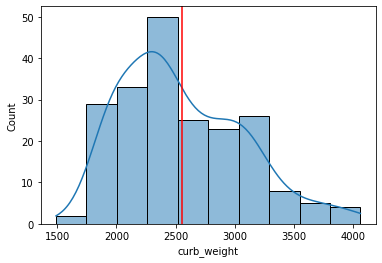

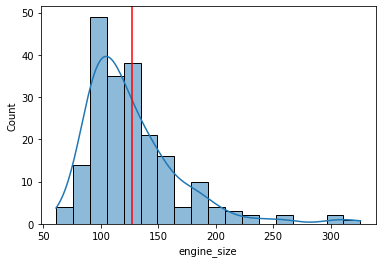

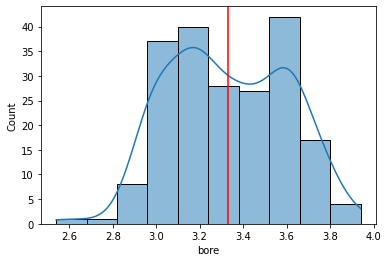

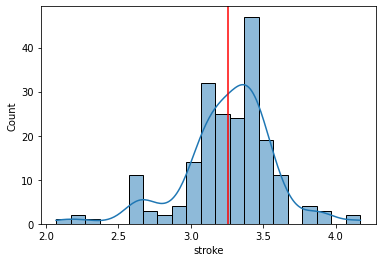

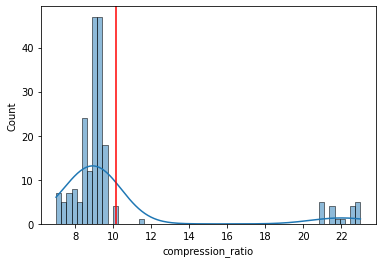

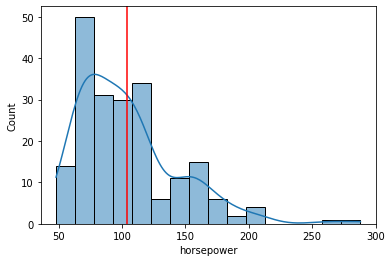

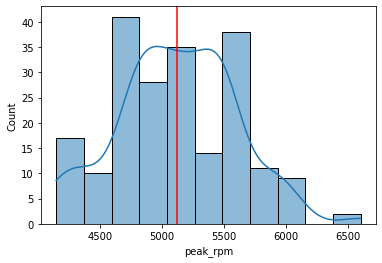

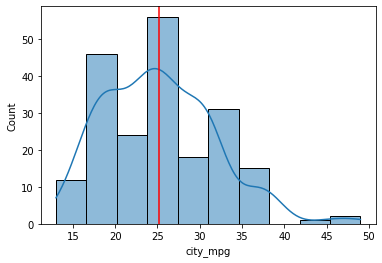

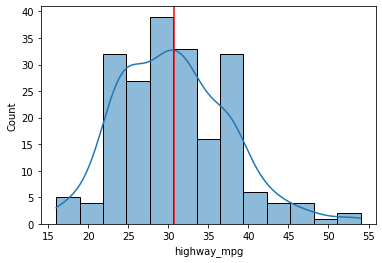

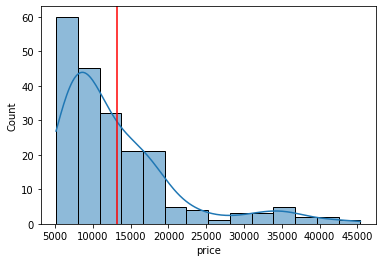

In [33]:
# Xem hình dạng phân phối của dữ liệu
for col in num_cols:
    ax = sns.histplot(data=automobile_data, x=col, kde=True)
    m = automobile_data[col].mean()
    ax.axvline(x = m, ymin = 0, color='r')
    plt.show()